<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/ToeplitzSVsUpperBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix A (5 x 5 Toeplitz matrix):
[[1. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 1. 2. 0.]
 [0. 0. 0. 1. 2.]
 [0. 0. 0. 0. 1.]]

Eigenvalues:
λ_1 = 1.0000000000
λ_2 = 1.0000000000
λ_3 = 1.0000000000
λ_4 = 1.0000000000
λ_5 = 1.0000000000

Determinant: 1.0000000000

Rank: 5

Inverse Matrix A^(-1):
[[ 1. -2.  4. -8. 16.]
 [ 0.  1. -2.  4. -8.]
 [ 0.  0.  1. -2.  4.]
 [ 0.  0.  0.  1. -2.]
 [ 0.  0.  0.  0.  1.]]

Verification: A * A^(-1) =
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Max deviation from identity: 0.00e+00



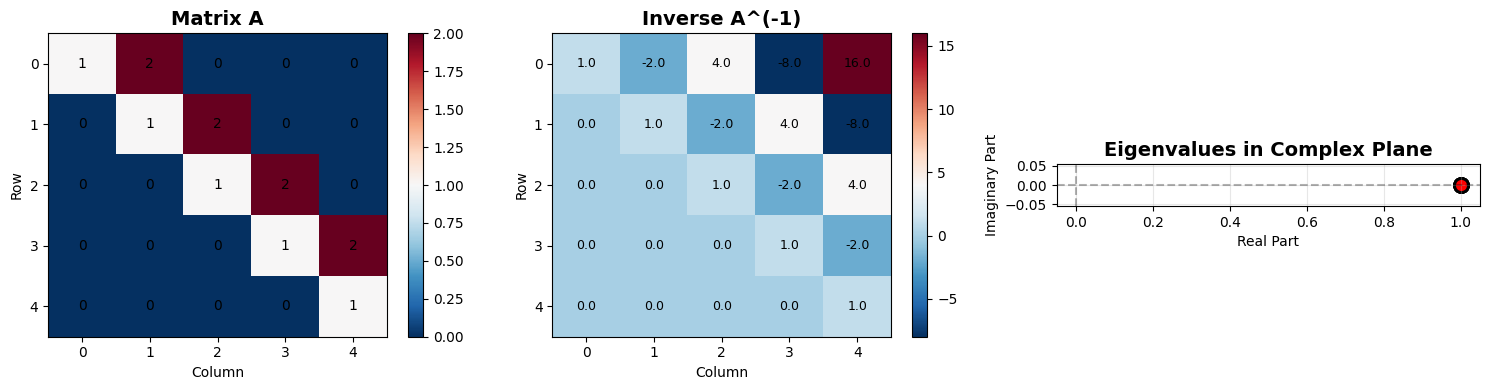

Pattern in A^(-1):
The inverse has a pattern where the k-th superdiagonal contains (-2)^k:
  Diagonal 0: 1.0 (expected: 1)
  Diagonal 1: -2.0 (expected: -2)
  Diagonal 2: 4.0 (expected: 4)
  Diagonal 3: -8.0 (expected: -8)
  Diagonal 4: 16.0 (expected: 16)

SUMMARY:
• Matrix size: 5 x 5
• Determinant: 1.000000
• Rank: 5 (full rank)
• All eigenvalues are real: True
• All eigenvalues equal 1: True
• Matrix is upper triangular
• Inverse exists and has alternating sign pattern with powers of 2


SINGULAR VALUE ANALYSIS

Singular values of A:
  σ_1 = 2.8852716788
  σ_2 = 2.5523972305
  σ_3 = 2.0371819689
  σ_4 = 1.4170931135
  σ_5 = 0.0470366964

Smallest singular value: σ_5 = 4.7036696364e-02

||A^(-1)||_2 = 2.1259996499e+01
1/||A^(-1)||_2 = 4.7036696364e-02
Verification: These should match σ_5 = 4.7036696364e-02
Difference: 6.94e-18


In [1]:
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

def create_toeplitz_matrix(m):
    """
    Create an m x m Toeplitz matrix with:
    - 1 on the main diagonal
    - 2 on the first superdiagonal
    - 0 everywhere else
    """
    # First column (all zeros except first element)
    c = np.zeros(m)
    c[0] = 1

    # First row (1, 2, 0, 0, ...)
    r = np.zeros(m)
    r[0] = 1
    if m > 1:
        r[1] = 2

    return toeplitz(c, r)

# Set matrix size
m = 5

# Create the matrix
A = create_toeplitz_matrix(m)

print("=" * 60)
print(f"Matrix A ({m} x {m} Toeplitz matrix):")
print("=" * 60)
print(A)
print()

# Compute eigenvalues
eigenvalues = np.linalg.eigvals(A)
print("=" * 60)
print("Eigenvalues:")
print("=" * 60)
for i, eig in enumerate(eigenvalues):
    if np.isreal(eig):
        print(f"λ_{i+1} = {eig.real:.10f}")
    else:
        print(f"λ_{i+1} = {eig:.10f}")
print()

# Compute determinant
det_A = np.linalg.det(A)
print("=" * 60)
print(f"Determinant: {det_A:.10f}")
print("=" * 60)
print()

# Compute rank
rank_A = np.linalg.matrix_rank(A)
print("=" * 60)
print(f"Rank: {rank_A}")
print("=" * 60)
print()

# Compute inverse
A_inv = np.linalg.inv(A)
print("=" * 60)
print("Inverse Matrix A^(-1):")
print("=" * 60)
print(A_inv)
print()

# Verify A * A^(-1) = I
product = A @ A_inv
print("=" * 60)
print("Verification: A * A^(-1) =")
print("=" * 60)
print(product)
print()
print(f"Max deviation from identity: {np.max(np.abs(product - np.eye(m))):.2e}")
print()

# Visualize the matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot A
im1 = axes[0].imshow(A, cmap='RdBu_r', aspect='auto')
axes[0].set_title('Matrix A', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Column')
axes[0].set_ylabel('Row')
plt.colorbar(im1, ax=axes[0])

# Add values to cells
for i in range(m):
    for j in range(m):
        text = axes[0].text(j, i, f'{A[i, j]:.0f}',
                           ha="center", va="center", color="black", fontsize=10)

# Plot A^(-1)
im2 = axes[1].imshow(A_inv, cmap='RdBu_r', aspect='auto')
axes[1].set_title('Inverse A^(-1)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Column')
axes[1].set_ylabel('Row')
plt.colorbar(im2, ax=axes[1])

# Add values to cells
for i in range(m):
    for j in range(m):
        text = axes[1].text(j, i, f'{A_inv[i, j]:.1f}',
                           ha="center", va="center", color="black", fontsize=9)

# Plot eigenvalues
axes[2].scatter(eigenvalues.real, eigenvalues.imag, s=100, c='red',
                marker='o', edgecolors='black', linewidths=2)
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[2].set_title('Eigenvalues in Complex Plane', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Real Part')
axes[2].set_ylabel('Imaginary Part')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Pattern analysis of the inverse
print("=" * 60)
print("Pattern in A^(-1):")
print("=" * 60)
print("The inverse has a pattern where the k-th superdiagonal contains (-2)^k:")
for k in range(min(5, m)):
    if k < m:
        diagonal = np.diag(A_inv, k)
        if len(diagonal) > 0:
            print(f"  Diagonal {k}: {diagonal[0]:.1f} (expected: {(-2)**k})")
print()

# Summary
print("=" * 60)
print("SUMMARY:")
print("=" * 60)
print(f"• Matrix size: {m} x {m}")
print(f"• Determinant: {det_A:.6f}")
print(f"• Rank: {rank_A} (full rank)")
print(f"• All eigenvalues are real: {np.allclose(eigenvalues.imag, 0)}")
print(f"• All eigenvalues equal 1: {np.allclose(eigenvalues, 1)}")
print(f"• Matrix is upper triangular")
print(f"• Inverse exists and has alternating sign pattern with powers of 2")
print("=" * 60)

# ============================================================================
# SINGULAR VALUE ANALYSIS - Finding bound on σ_m
# ============================================================================
print("\n")
print("=" * 60)
print("SINGULAR VALUE ANALYSIS")
print("=" * 60)

# Compute all singular values of A
singular_values = np.linalg.svd(A, compute_uv=False)
sigma_m = singular_values[-1]  # smallest singular value

print(f"\nSingular values of A:")
for i, sv in enumerate(singular_values):
    print(f"  σ_{i+1} = {sv:.10f}")

print(f"\nSmallest singular value: σ_{m} = {sigma_m:.10e}")

# Compute using the inverse relationship: 1/σ_m = ||A^(-1)||_2
norm_A_inv = np.linalg.norm(A_inv, ord=2)
sigma_m_from_inv = 1.0 / norm_A_inv

print(f"\n||A^(-1)||_2 = {norm_A_inv:.10e}")
print(f"1/||A^(-1)||_2 = {sigma_m_from_inv:.10e}")
print(f"Verification: These should match σ_{m} = {sigma_m:.10e}")
print(f"Difference: {abs(sigma_m - sigma_m_from_inv):.2e}")



We first prove  $\|A\|_{2}=\sigma _{1}$, the largest singular value, in order proceed to show $\frac{1}{\sigma_m} = \|A^{-1}\|_{2}=\sigma _{1}$.  

Let $A$ be an $m\times n$ matrix with $A=U\Sigma V^{*}$ as its SVD, where $U$ and $V$ are unitary matrices and $\Sigma$ is a diagonal matrix containing the singular values $\sigma _{1},\dots ,\sigma _{m}$ ordered from largest to smallest.  See that

$$\|A\|_{2}=\max _{\|x\|_{2}=1}\|Ax\|_{2}=\max _{\|x\|_{2}=1}\|U\Sigma V^{*}x\|_{2},$$

and since unitary matrices preserve the norm, we can simplify  $\|A\|_{2}=\max _{\|x\|_{2}=1}\|\Sigma V^{*}x\|_{2}$.  Moreover, recall that $V$ is also unitary, and let $y = \|V^* x\|$.  Then we preserve $\|y\|_{2}=\|V^{*}x\|_{2}=\|x\|_{2}=1$ and SVD simplifies further to $\|A\|_{2}=\max _{\|y\|_{2}=1}\|\Sigma y\|_{2}$, where

$$\|\Sigma y\|_{2}=\sqrt{\sum _{i=1}^{n}(\sigma _{i}y_{i})^{2}} = \sqrt{\sum _{i=1}^{n}\sigma _{i}^{2}y_{i}^{2}}\le \sqrt{\sum _{i=1}^{n}\sigma _{1}^{2}y_{i}^{2}}=\sigma _{1}\sqrt{\sum _{i=1}^{n}y_{i}^{2}}=\sigma _{1}\|y\|_{2}.$$
In maximizing, we must have $\|A\|_{2}\le \sigma _{1}$, the largest singular value.  This bound is acheived by setting $y = e_1$.  



The inverse of $A$ is $A^{-1}$ with the diagonal entires $\Sigma ^{-1}$ as $1/\sigma _{1},1/\sigma _{2},\dots ,1/\sigma _{m}$.  Since the singluar values of $A$ are ordered  $\sigma _{1}\ge \sigma _{2}\ge \dots \ge \sigma _{m}>0$, the reciprocals are ordered $\frac{1}{\sigma _{1}}\le \frac{1}{\sigma _{2}}\le \dots \le \frac{1}{\sigma _{m}}$.  It follows similarly from the proof that  $\|A\|_{2}=\sigma _{1}$ that $\|A^{-1}\|_{2}=1/\sigma _{m}$.  
